In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('freMTPLfreq.csv')
df2=pd.read_csv('freMTPLsev.csv')

In [3]:
df3 = df2.groupby(['PolicyID'])[['ClaimAmount']].agg('sum').reset_index()
df_merged = pd.merge(df1, df3, how='outer', on='PolicyID').fillna(0)

In [4]:
#2.1 Import Data and Required Packages
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413169 entries, 0 to 413168
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PolicyID     413169 non-null  int64  
 1   ClaimNb      413169 non-null  int64  
 2   Exposure     413169 non-null  float64
 3   Power        413169 non-null  object 
 4   CarAge       413169 non-null  int64  
 5   DriverAge    413169 non-null  int64  
 6   Brand        413169 non-null  object 
 7   Gas          413169 non-null  object 
 8   Region       413169 non-null  object 
 9   Density      413169 non-null  int64  
 10  ClaimAmount  413169 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 34.7+ MB


In [7]:
#No Null values found in the dataset
df_merged.isnull().sum()

PolicyID       0
ClaimNb        0
Exposure       0
Power          0
CarAge         0
DriverAge      0
Brand          0
Gas            0
Region         0
Density        0
ClaimAmount    0
dtype: int64

In [9]:
#No Duplicate values found in the dataset
df_merged.duplicated().sum()

0

In [10]:
#Exploring Data

# define numerical & categorical columns
numeric_features = [feature for feature in df_merged.columns if df_merged[feature].dtype != 'O']
categorical_features = [feature for feature in df_merged.columns if df_merged[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['PolicyID', 'ClaimNb', 'Exposure', 'CarAge', 'DriverAge', 'Density', 'ClaimAmount']

We have 4 categorical features : ['Power', 'Brand', 'Gas', 'Region']


In [11]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df_merged[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Power
f    23.166791
g    22.072808
e    18.641766
d    16.461545
h     6.461763
j     4.365768
i     4.263631
k     2.308256
l     1.132950
m     0.443402
o     0.364984
n     0.316335
Name: proportion, dtype: float64
---------------------------
Brand
Renault, Nissan or Citroen            52.811319
Japanese (except Nissan) or Korean    19.135027
Opel, General Motors or Ford           9.052470
Volkswagen, Audi, Skoda or Seat        7.899431
Mercedes, Chrysler or BMW              4.666371
Fiat                                   4.047496
other                                  2.387885
Name: proportion, dtype: float64
---------------------------
Gas
Regular    50.154779
Diesel     49.845221
Name: proportion, dtype: float64
---------------------------
Region
Centre                38.870535
Ile-de-France         16.891635
Bretagne              10.194860
Pays-de-la-Loire       9.378971
Aquitaine              7.582611
Nord-Pas-de-Calais     6.603835
Poitou-Charentes       4.609736
Basse-Norman

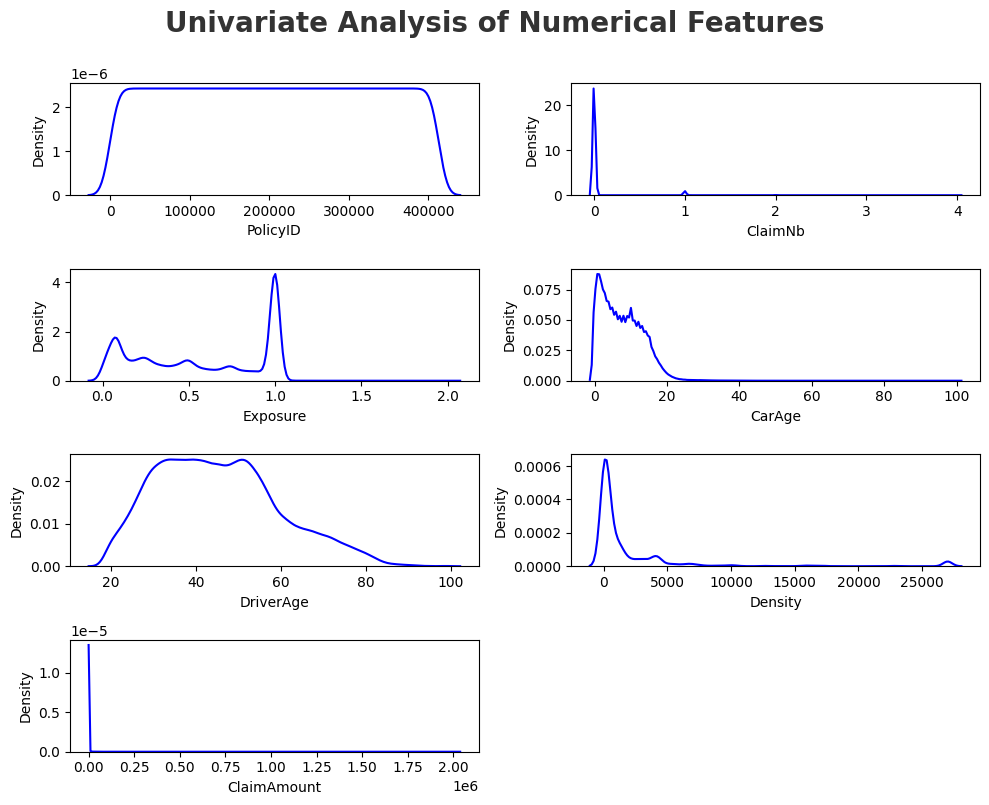

In [13]:
import math
plt.figure(figsize=(10, 8))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Calculate number of rows and columns required
num_features = len(numeric_features)
num_cols = 2  # Fixed number of columns
num_rows = math.ceil(num_features / num_cols)

for i in range(0, len(numeric_features)):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=df_merged[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

1. Density,CarAge,ClaimNb,Claim Amount are rightly skewed.
2. Most of the Claims are zero 


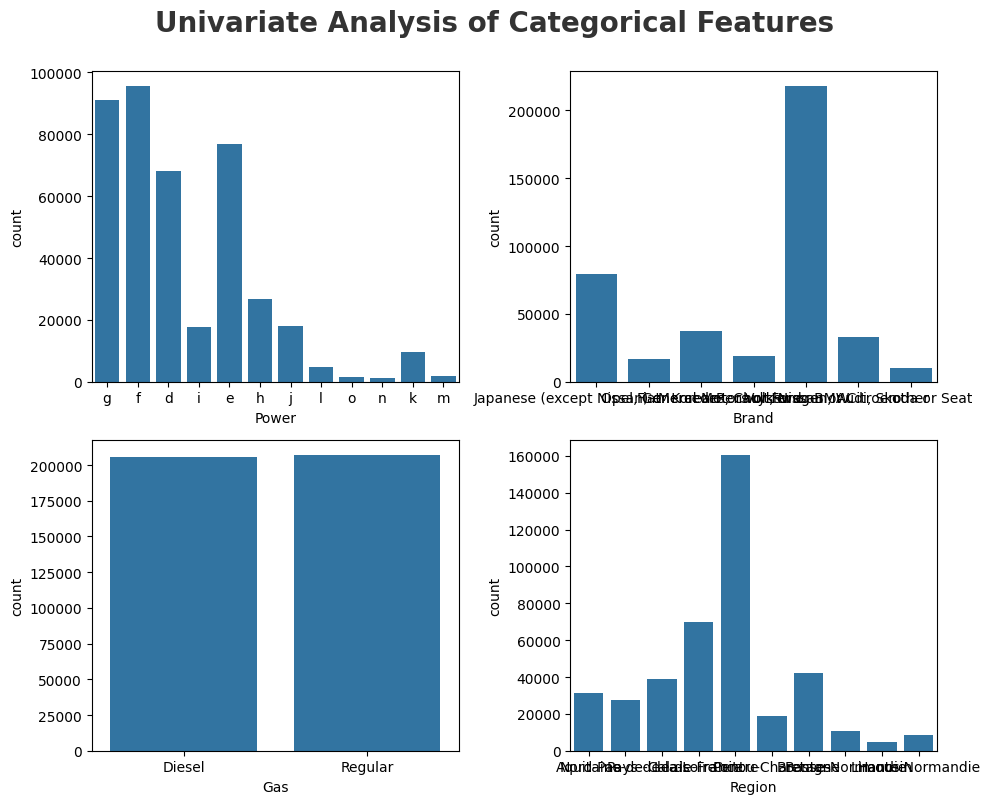

In [14]:
# categorical columns
# categorical_features.remove('case_id')
plt.figure(figsize=(10, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
# Calculate number of rows and columns required
cat_features = len(categorical_features)
num_cols = 2  # Fixed number of columns
num_rows = math.ceil(cat_features / num_cols)



for i in range(0, len(categorical_features)):
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(x=df_merged[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [15]:
discrete_features=[feature for feature in numeric_features if len(df_merged[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df_merged[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['ClaimNb']

We have 6 continuous_features : ['PolicyID', 'Exposure', 'CarAge', 'DriverAge', 'Density', 'ClaimAmount']


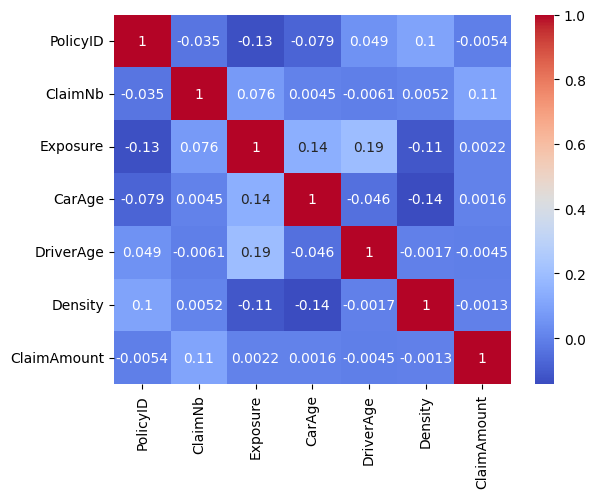

In [17]:
# Check Multicollinearity in Numerical features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame with numerical features
correlation_matrix = df_merged[numeric_features].corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
from scipy.stats import chi2_contingency
chi=[]

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df_merged['ClaimAmount'],df_merged[feature]))[1] < 0.05:
        chi.append('Reject Null Hypothesis- relationship')
    else:
        chi.append('Failed to Reject Null Hypothesis- no relationship')

result = pd.DataFrame(data=[categorical_features, chi]).T
result.columns = ['Column', 'Hypothesis Result']
result


,Column,Hypothesis Result
0,Power,Failed to Reject Null Hypothesis- no relationship
1,Brand,Reject Null Hypothesis- relationship
2,Gas,Failed to Reject Null Hypothesis- no relationship
3,Region,Failed to Reject Null Hypothesis- no relationship


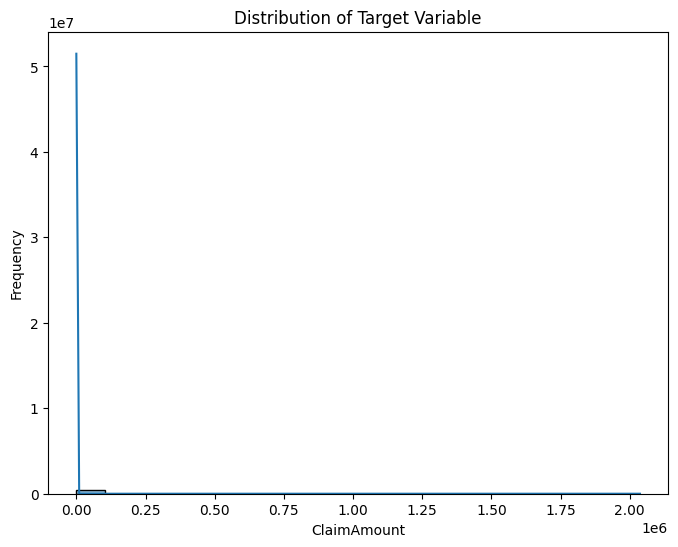

Summary Statistics:
 count    4.131690e+05
mean     8.341642e+01
std      4.192526e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.036833e+06
Name: ClaimAmount, dtype: float64
Skewness: 374.77736089043725
Kurtosis: 165546.30990317528


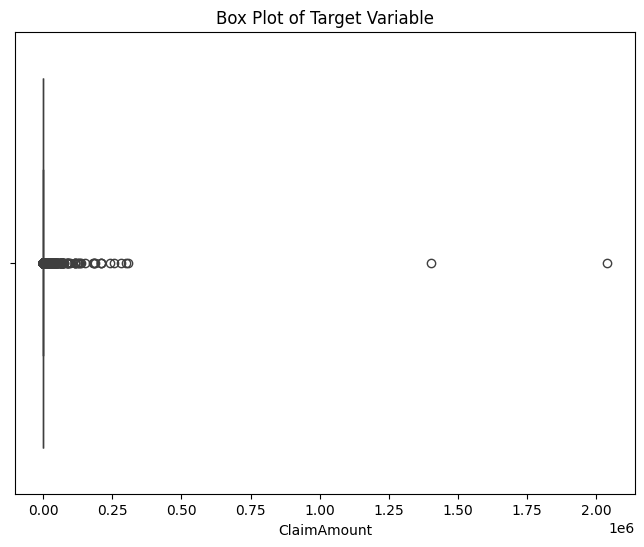

Quantiles:
 0.25    0.0
0.50    0.0
0.75    0.0
Name: ClaimAmount, dtype: float64


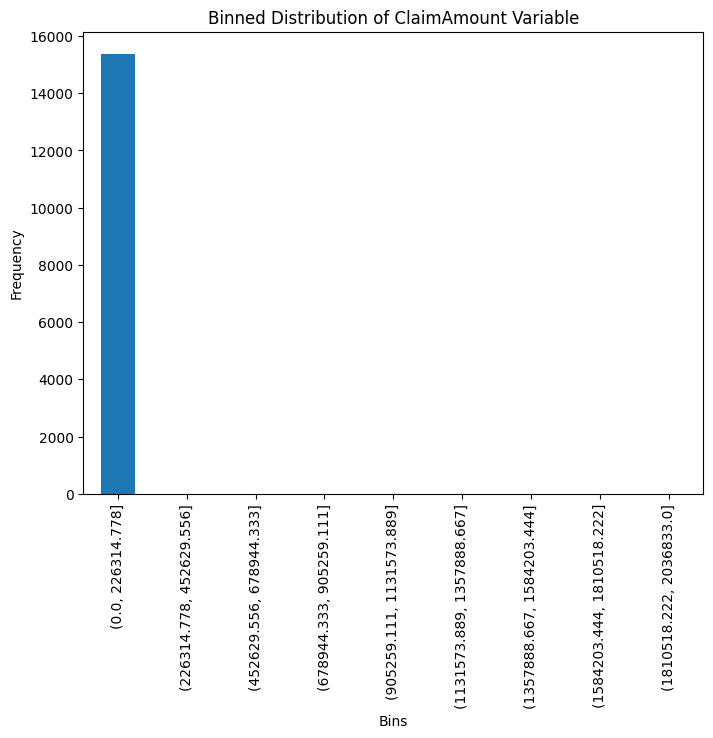

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'target' is your continuous target variable

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_merged['ClaimAmount'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('ClaimAmount')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
summary_stats = df_merged['ClaimAmount'].describe()
print("Summary Statistics:\n", summary_stats)

# Check for skewness and kurtosis
skewness = df_merged['ClaimAmount'].skew()
kurtosis = df_merged['ClaimAmount'].kurtosis()
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Box plot for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_merged['ClaimAmount'])
plt.title('Box Plot of Target Variable')
plt.xlabel('ClaimAmount')
plt.show()

# Quantiles and percentiles
quantiles = df_merged['ClaimAmount'].quantile([0.25, 0.5, 0.75])
print("Quantiles:\n", quantiles)

# Binning the target variable
bin_edges = np.linspace(df_merged['ClaimAmount'].min(), df_merged['ClaimAmount'].max(), num=10)
df_merged['target_binned'] = pd.cut(df_merged['ClaimAmount'], bins=bin_edges)
bin_counts = df_merged['target_binned'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
bin_counts.plot(kind='bar')
plt.title('Binned Distribution of ClaimAmount Variable')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()
